В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/machine_learning_for_people/kaggle_competition/bank_customer_churn_prediction/

sample_submission.csv  saved_data  test.csv  train.csv


In [245]:
bank_train_df = pd.read_csv("drive/MyDrive/machine_learning_for_people/kaggle_competition/bank_customer_churn_prediction/train.csv", index_col=0)

In [246]:
bank_train_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [247]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(bank_train_df, test_size=0.25, random_state=42, stratify = bank_train_df['Exited'])

In [248]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (11250, 13)
val_df.shape : (3750, 13)


Оскільки окрема тестова вибірка вже надана, ми можемо використовувати розподіл 75%-25% для навчання та валідації.

stratify=bank_train_df['Exited']забезпечує те, що частка класів у таргетній змінній Exited збережеться однаковою у тренувальному та валідаційному наборах.

Після поділу датасету bank_train_df на тренувальну train_df та валідаційну val_df вибірки у співвідношенні 75%/25%, ми отримали:

Тренувальна вибірка: 11 250 рядків, 13 колонок
Валідаційна вибірка: 3 750 рядків, 13 колонок


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [249]:
# Визначення назв колонок
input_cols = list(train_df.columns)[:-1]
target_col = 'Exited'

In [250]:
print(input_cols)

['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [251]:
print(target_col)

Exited


In [252]:
# Вхідні дані та цільові значення для навчальних і валідаційних наборів
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

train_inputs містить незалежні змінні з тренувальної вибірки train_df.


train_targets містить значення цільової змінної Exited для тренувальної вибірки.


val_inputs та val_targets аналогічно створюють вхідні та цільові дані для валідаційної вибірки.

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [253]:
import numpy as np

In [254]:
# Визначення числових колонок для ознак
numeric_cols = train_inputs.select_dtypes(include=[np.number]).columns.tolist()

# Визначення категоріальних колонок для ознак
categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()

print("Числові колонки:", numeric_cols)
print("Категоріальні колонки:", categorical_cols)

Числові колонки: ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Категоріальні колонки: ['Surname', 'Geography', 'Gender']


Ознаки містять 9 числових змінних та 3 категоріальні змінні.
CustomerId та Surname, ймовірно, не є корисними для моделювання, оскільки вони є унікальними для кожного клієнта.

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [255]:
bank_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       15000 non-null  float64
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


Наші дані не містять пропущених значень

Переглянемо деякі основні статистики для числових стовпців

In [256]:
train_inputs[numeric_cols].describe().round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,15691021.87,658.99,37.69,5.02,42952.89,1.59,0.79,0.49,117904.96
std,150609.24,72.12,8.14,2.78,59923.39,0.53,0.41,0.50,45553.03
min,1581102.00,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,15635241.00,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83155.87
50%,15690134.00,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123587.94
75%,15757396.25,709.00,42.00,7.00,109863.19,2.00,1.00,1.00,156774.94
max,15815690.00,850.00,72.00,10.00,209767.31,4.00,1.00,1.00,199992.48


Вилучимо ознаку 'CustomerId', оскільки ця колонка не містить корисної інформації для прогнозування. Ця змінна унікальна для кожного клієнта і не містить жодної інформації, яка допоможе передбачити чи покине клієнт банк. Вона лише додасть шум у модель.

In [257]:
numeric_cols = [col for col in numeric_cols if col !='CustomerId']

Маштабуємо числові ознаки.

In [258]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

Для маштабування числових змінних ми використали MinMaxScaler. Масштабування допомрже уникнути ситуації, коли одна ознака (наприклад, EstimatedSalary, що має великі значення) домінуватиме над іншими (NumOfProducts, що має маленькі значення).

Використання MinMaxScaler приводить значення до діапазону [0, 1], що допоможе моделі швидше і стабільніше навчатися.

In [259]:
train_inputs[numeric_cols]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,
8263,0.632458,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916
14199,0.479714,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712
1856,0.591885,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017
3013,0.653938,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071
8266,0.632458,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109
...,...,...,...,...,...,...,...,...
9493,0.482100,0.277778,0.4,0.000000,0.333333,0.0,0.0,0.617686
7687,0.510740,0.277778,0.3,0.417325,0.000000,1.0,0.0,0.675392
8143,0.453461,0.203704,0.8,0.000000,0.333333,1.0,1.0,0.667682


In [260]:
val_inputs[numeric_cols]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,
1855,0.267303,0.203704,0.9,0.570579,0.000000,0.0,0.0,0.279047
1273,0.398568,0.425926,0.3,0.590481,0.000000,1.0,0.0,0.884371
5414,0.453461,0.240741,0.7,0.000000,0.000000,1.0,1.0,0.751226
10923,0.396181,0.703704,0.3,0.000000,1.000000,1.0,0.0,0.514675
5835,0.758950,0.444444,0.5,0.000000,0.000000,1.0,1.0,0.909003
...,...,...,...,...,...,...,...,...
1036,1.000000,0.296296,0.4,0.000000,0.333333,1.0,0.0,0.901755
9017,0.675418,0.351852,0.6,0.000000,0.333333,1.0,0.0,0.768330
9963,0.360382,0.185185,0.4,0.470370,0.000000,1.0,0.0,0.287916


In [261]:
train_inputs[numeric_cols].describe().round(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.0000,11250.0000,11250.0000,11250.0000,11250.0000,11250.0000,11250.0000,11250.0000
mean,0.5441,0.3646,0.5023,0.2048,0.1966,0.7920,0.4911,0.5895
std,0.1721,0.1508,0.2782,0.2857,0.1772,0.4059,0.4999,0.2278
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.4105,0.2593,0.3000,0.0000,0.0000,1.0000,0.0000,0.4158
50%,0.5489,0.3519,0.5000,0.0000,0.3333,1.0000,0.0000,0.6179
75%,0.6635,0.4444,0.7000,0.5237,0.3333,1.0000,1.0000,0.7839
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [262]:
train_inputs[categorical_cols].nunique()

,0
Surname,720
Geography,3
Gender,2


Вилучимо ознаку 'Surname', оскільки ця колонка не містить корисної інформації для прогнозування. Прізвище не впливає на рішення клієнта залишити банк.

In [263]:
categorical_cols = [col for col in categorical_cols if col != 'Surname']

Видалення нерелевантних ознак зменшить кількість зайвих даних, що може покращити продуктивність моделі.

Перетворимо категоріальні колонки за допомогою OneHotEncoder в числові.

Наша модель приймає на вхід числові дані, вона не може працювати безпосередньо з текстовими даними.

One-hot кодування дозволяє перетворити категоріальні ознаки в числовий формат без втрати інформації.

In [264]:
from sklearn.preprocessing import OneHotEncoder

# Кодування категорійних даних
encoder = OneHotEncoder()
encoder.fit(train_inputs[categorical_cols])

# Отримання назв колонок
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [265]:
encoded_cols

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [266]:
# Трансформація даних
encoded_train = encoder.transform(train_inputs[categorical_cols]).toarray()
encoded_val = encoder.transform(val_inputs[categorical_cols]).toarray()

In [267]:
encoded_train

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [268]:
# Створення DataFrame для закодованих даних
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_cols, index=train_inputs.index)
encoded_val_df = pd.DataFrame(encoded_val, columns=encoded_cols, index=val_inputs.index)

In [269]:
encoded_train_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,
8263,1.0,0.0,0.0,0.0,1.0
14199,0.0,1.0,0.0,1.0,0.0
1856,1.0,0.0,0.0,1.0,0.0
3013,1.0,0.0,0.0,0.0,1.0
8266,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
9493,1.0,0.0,0.0,1.0,0.0
7687,0.0,0.0,1.0,0.0,1.0
8143,1.0,0.0,0.0,0.0,1.0


In [270]:
# Об'єднання з числовими колонками
train_inputs = pd.concat([train_inputs[numeric_cols], encoded_train_df], axis=1)
val_inputs = pd.concat([val_inputs[numeric_cols], encoded_val_df], axis=1)


In [271]:
from IPython.display import display

pd.set_option('display.max_columns', None)

print("train inputs:")
display(train_inputs.head())

print("validation inputs:")
display(val_inputs.head())

train inputs:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
8263,0.632458,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


validation inputs:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
1855,0.267303,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,0.398568,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,0.453461,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,0.396181,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,0.758950,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0


Ми об'єднали закодовані категоріальні змінні з масштабованими числовими.
Отримали фінальні train_inputs та val_inputs, які готові для навчання моделі.


Всі ознаки тепер у числовому форматі, що робить їх сумісними з алгоритмами машинного навчання.


Модель отримає стандартизований набір даних, що дозволить їй працювати ефективніше.

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [272]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)


train_inputs: (11250, 13)
train_targets: (11250,)
val_inputs: (3750, 13)
val_targets: (3750,)


In [273]:
# Встановлення бібліотеки для роботи з Parquet
!pip install pyarrow --quiet

In [274]:
import os

# Каталог для збереження файлів
save_dir = "drive/MyDrive/machine_learning_for_people/kaggle_competition/bank_customer_churn_prediction/saved_data"
os.makedirs(save_dir, exist_ok=True)

train_inputs_path = os.path.join(save_dir, "train_inputs.parquet")
train_targets_path = os.path.join(save_dir, "train_targets.parquet")
val_inputs_path = os.path.join(save_dir, "val_inputs.parquet")
val_targets_path = os.path.join(save_dir, "val_targets.parquet")

# Збереження даних
train_inputs.to_parquet(train_inputs_path)
val_inputs.to_parquet(val_inputs_path)

pd.DataFrame(train_targets).to_parquet(train_targets_path)
pd.DataFrame(val_targets).to_parquet(val_targets_path)


In [275]:
# Завантаження даних для перевірки
train_inputs = pd.read_parquet(train_inputs_path)
val_inputs = pd.read_parquet(val_inputs_path)

In [276]:
target_col = train_targets.name  # Визначення імені колонки цільової змінної
train_targets = pd.read_parquet(train_targets_path)[target_col]
val_targets = pd.read_parquet(val_targets_path)[target_col]

In [277]:
# Перевірка списку збережених файлів
saved_files = os.listdir(save_dir)
print("Список збережених файлів:")
print(saved_files)

Список збережених файлів:
['train_inputs.parquet', 'train_targets.parquet', 'val_inputs.parquet', 'val_targets.parquet']


In [278]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)


train_inputs: (11250, 13)
train_targets: (11250,)
val_inputs: (3750, 13)
val_targets: (3750,)


Всі дані (як вхідні ознаки, так і цільові значення) збережені у форматі Parquet.


Після збереження файлів ми перевірили, що вони знаходяться в правильному каталозі, і їхні назви збігаються з очікуваними.


Після зчитування збережених файлів дані мають правильні розміри і структуру.

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [280]:
X_train = train_inputs.copy()
X_val = val_inputs.copy()

In [281]:
y_train = train_targets
y_val = val_targets

In [282]:
# Ініціалізація та навчання моделі
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [283]:
# Прогнозування
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [284]:
# Оцінка результатів
print("\nОцінка на тренувальному наборі:")
print(classification_report(y_train, y_train_pred))

print("\nОцінка на валідаційному наборі:")
print(classification_report(y_val, y_val_pred))


Оцінка на тренувальному наборі:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      8961
         1.0       0.77      0.54      0.64      2289

    accuracy                           0.87     11250
   macro avg       0.83      0.75      0.78     11250
weighted avg       0.87      0.87      0.87     11250


Оцінка на валідаційному наборі:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      2987
         1.0       0.75      0.55      0.63       763

    accuracy                           0.87      3750
   macro avg       0.82      0.75      0.78      3750
weighted avg       0.86      0.87      0.86      3750



Ми створили два набори даних: X_train та X_val, які містять лише колонки, які підуть на вхід моделі.

Також визначено цільову змінну y_train та y_val, що містить значення класу.

Ми ініціалізували модель LogisticRegression, використовуючи стандартні параметри та навчили модель на тренувальних даних, передавши їй вхідні дані X_train та цільову змінну y_train.


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [285]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [286]:
# Прогнозування ймовірностей
y_train_prob = model.predict_proba(X_train)[:, 1]
y_val_prob = model.predict_proba(X_val)[:, 1]


Confusion Matrix на тренувальному наборі:


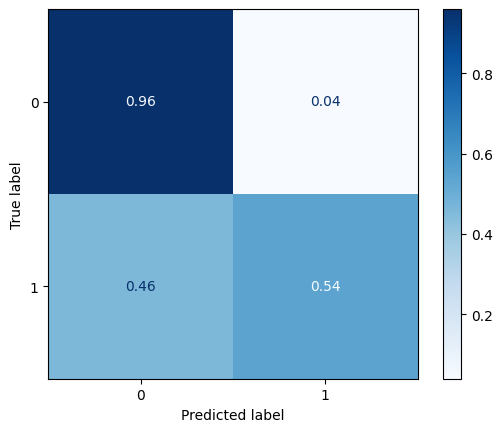


Confusion Matrix на валідаційному наборі:


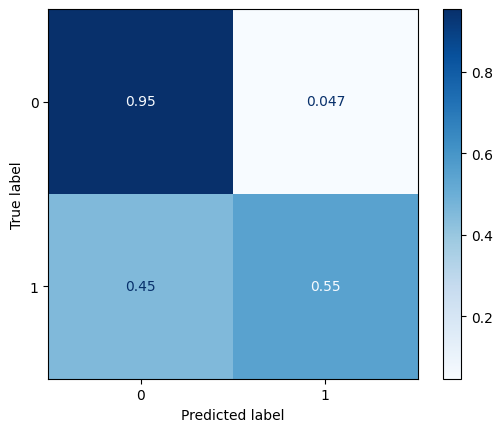

In [287]:
# Confusion Matrix
print("\nConfusion Matrix на тренувальному наборі:")
train_cm = confusion_matrix(y_train, y_train_pred, normalize='true')
ConfusionMatrixDisplay(train_cm).plot(cmap='Blues')
plt.show()

print("\nConfusion Matrix на валідаційному наборі:")
val_cm = confusion_matrix(y_val, y_val_pred, normalize='true')
ConfusionMatrixDisplay(val_cm).plot(cmap='Blues')
plt.show()


AUROC на тренувальному наборі: 0.88
AUROC на валідаційному наборі: 0.88


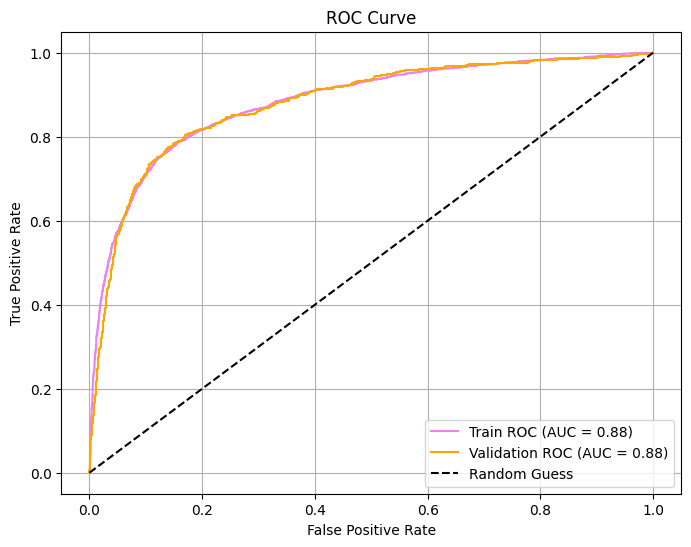

In [288]:
from sklearn.metrics import roc_curve, auc

# ROC Curve і AUROC
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_prob)
fpr_val, tpr_val, thresholds = roc_curve(y_val, y_val_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

print(f"\nAUROC на тренувальному наборі: {roc_auc_train:.2f}")
print(f"AUROC на валідаційному наборі: {roc_auc_val:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {roc_auc_train:.2f})", color='violet')
plt.plot(fpr_val, tpr_val, label=f"Validation ROC (AUC = {roc_auc_val:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [289]:
#F1 Score
f1_train = f1_score(y_train, y_train_pred)
f1_val = f1_score(y_val, y_val_pred)

print(f"F1 Score на тренувальному наборі: {f1_train:.2f}")
print(f"F1 Score на валідаційному наборі: {f1_val:.2f}")

F1 Score на тренувальному наборі: 0.64
F1 Score на валідаційному наборі: 0.63


Метод predict_proba() за замовчуванням застосовує поріг 0.5.
Якщо ймовірність класу 1 більше за 0.5, повертається 1.
Якщо ймовірність класу 1 менша або рівна 0.5, повертається 0.

Для оцінки помилок класифікації ми побудували Confusion Matrix для тренувальних та валідаційних наборів. Вона показує, скільки класифікованих випадків модель передбачила правильно (True Positives та True Negatives), а скільки — неправильно (False Positives та False Negatives).
Ми нормували матрицю, щоб побачити відносні значення, а не абсолютні.

Результати Confusion Matrix на тренувальному наборі:

*   0.96: означає, що 96% об'єктів класу 0 були правильно класифіковані як клас 0.
*   0.04: означає, що 4% об'єктів класу 0 були помилково класифіковані як клас 1.
*  0.48: означає, що 48% об'єктів класу 1 були помилково класифіковані як клас 0.
*  0.52: означає, що 52% об'єктів класу 1 були правильно класифіковані як клас 1.

Результати Confusion Matrix на валідаційному наборі отримано дуже подібні.


Ми побудували ROC curve для тренувального та валідаційного наборів, використовуючи ймовірності передбачених класів (для класу 1).
AUROC (Area Under the ROC Curve) вимірює площу під цією кривою. Чим більша площа, тим краще модель відрізняє класи.

Для тренувального та валідаційного наборів я отримала AUROC = 0.88, це вказує на досить хорошу якість моделі.

Ми обчислили F1 Score для тренувального та валідаційного наборів, щоб оцінити, наскільки добре модель розпізнає обидва класи.

F1 Score на тренувальному наборі: 0.62


F1 Score на валідаційному наборі: 0.63

Модель демонструє схожу продуктивність як на навчальних, так і на валідаційних даних.
F1 Score на рівні 0.62 і 0.63 є задовільним, але він може вказувати на певні проблеми з класифікацією менш представленого класу (клас 1 — залишив банк). Це може бути через дисбаланс класів, де модель переважно правильно класифікує клас 0 (не покинув банк), але з проблемами для класу 1.


Висновок:

Модель є задовільною: вона добре класифікує людей, які не покинули банк (клас 0), але її ефективність у класифікації тих, хто залишив банк (клас 1), потребує покращення.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [80]:
#Визначення мажорного класу у тренувальних даних
majority_class = y_train.value_counts().idxmax()
print(f"Мажорний клас у тренувальних даних: {majority_class}")

Мажорний клас у тренувальних даних: 0.0


In [81]:
# Генеруємо масиви передбачень
y_train_majority = np.full(len(y_train), majority_class)
y_val_majority = np.full(len(y_val), majority_class)

In [83]:
# Розрахунок Accuracy для мажорної моделі
majority_train_accuracy = accuracy_score(y_train, y_train_majority)
majority_val_accuracy = accuracy_score(y_val, y_val_majority)

In [86]:
print(f"Accuracy мажорної моделі на тренувальному наборі: {majority_train_accuracy:.2f}")
print(f"Accuracy мажорної моделі на валідаційному наборі: {majority_val_accuracy:.2f}")

Accuracy мажорної моделі на тренувальному наборі: 0.80
Accuracy мажорної моделі на валідаційному наборі: 0.80


In [87]:
# 4. Accuracy для натренованої моделі
model_train_accuracy = accuracy_score(y_train, model.predict(X_train))
model_val_accuracy = accuracy_score(y_val, model.predict(X_val))

print(f"Accuracy натренованої моделі на тренувальному наборі: {model_train_accuracy:.2f}")
print(f"Accuracy натренованої моделі на валідаційному наборі: {model_val_accuracy:.2f}")

Accuracy натренованої моделі на тренувальному наборі: 0.87
Accuracy натренованої моделі на валідаційному наборі: 0.87


Порівняємо наші моделі за допомогою метрики Accuracy:


Accuracy мажорної моделі на тренувальному наборі: 0.80,
Accuracy мажорної моделі на валідаційному наборі: 0.80


Accuracy натренованої моделі на тренувальному наборі: 0.87,
Accuracy натренованої моделі на валідаційному наборі: 0.87


Висновок:


Наша модель краща за мажорну і забезпечує додаткову цінність.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [175]:
import joblib

Створимо словник, що містить усі необхідні об'єкти

In [176]:
log_reg = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [177]:
# Збереження у файл
joblib.dump(log_reg, 'log_reg.joblib')

['log_reg.joblib']

In [178]:
# Завантаження збереженої моделі та інших об'єктів
log_reg_loaded = joblib.load('log_reg.joblib')


In [179]:
# Отримання моделі з завантажених даних
model_2 = log_reg_loaded['model']

In [180]:
# Перевіримо чи модель працює після завантаження
y_val_pred_2 = model_2.predict(X_val)
accuracy_score(y_val, y_val_pred_2)


0.8709333333333333

Модель працює після завантаження працює так само, як і до збереження.

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [226]:
import warnings
warnings.filterwarnings("ignore")

bank_train_df = bank_train_df.copy()

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    scaler.fit(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols]).toarray()
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [227]:
probabilities = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, bank_train_df)
print("Ймовірності належності до класу 1:", probabilities)

Ймовірності належності до класу 1: [0.00606247 0.03386774 0.32926848 ... 0.88256268 0.18276352 0.0894182 ]


Функція predict_raw_df робить попередній препроцесинг здійснюючи масштабування числових ознак та кодування категоріальних змінних, передає ці дані в модель і повертає ймовірності належності до класу 1 для кожного запису в наборі даних.

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [230]:
# Зчитуємо дані з test.csv в змінну test_raw_df
test_raw_df = pd.read_csv("drive/MyDrive/machine_learning_for_people/kaggle_competition/bank_customer_churn_prediction/test.csv", index_col=0)

In [231]:
test_raw_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [232]:
test_raw_df = test_raw_df.copy()

In [233]:
# Видаляємо нерелевантні ознаки як ми це зробили у тренувальному датасеті
test_raw_df = test_raw_df.drop(['Surname', 'CustomerId'], axis=1)

In [234]:
# Виконуємо передбачення за допомогою функції predict_raw_df

test_raw_df["Exited"] = predict_raw_df(scaler=scaler, encoder=encoder, numeric_cols=numeric_cols,
    categorical_cols=categorical_cols, input_df=test_raw_df)

In [235]:
test_raw_df["Exited"]

,Exited
id,
15000,0.056303
15001,0.029184
15002,0.119830
15003,0.154101
15004,0.042897
...,...
24995,0.018991
24996,0.020582
24997,0.017363


In [236]:
test_raw_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
id,,,,,,,,,,,,,,,,
15000,0.365155,Germany,Male,0.214286,0.181818,0.781918,0.000000,1.0,1.0,0.025851,0.0,1.0,0.0,0.0,1.0,0.056303
15001,0.286396,France,Male,0.375000,0.454545,0.000000,0.333333,1.0,1.0,0.010998,1.0,0.0,0.0,0.0,1.0,0.029184
15002,0.656325,France,Male,0.446429,0.727273,0.000000,0.333333,1.0,0.0,0.025666,1.0,0.0,0.0,0.0,1.0,0.119830
15003,0.682578,Spain,Male,0.482143,0.272727,0.000000,0.000000,1.0,1.0,0.027332,0.0,0.0,1.0,0.0,1.0,0.154101
15004,0.384248,Spain,Male,0.446429,0.727273,0.000000,0.333333,1.0,1.0,0.023518,0.0,0.0,1.0,0.0,1.0,0.042897


Ми додали колонку Exited в датафрейм test_raw_df, що містить передбачену ймовірність належності клієнта до класу 1 (клієнт залишить банк).

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [237]:
# Зчитування 'sample_submission.csv'
submission_df = pd.read_csv('drive/MyDrive/machine_learning_for_people/kaggle_competition/bank_customer_churn_prediction/sample_submission.csv', index_col=0)


In [238]:
submission_df.head()

,Exited
id,
15000,0.5
15001,0.5
15002,0.5
15003,0.5
15004,0.5


In [239]:
# Заповнення колонки 'Exited' передбаченими значеннями
submission_df["Exited"] = test_raw_df["Exited"]


In [240]:
# Виведення перших 5 рядків фінального датасету
submission_df.head()

,Exited
id,
15000,0.056303
15001,0.029184
15002,0.119830
15003,0.154101
15004,0.042897


In [241]:
# Збереження результату в файл 'submission_log_reg.csv'
submission_df.to_csv('submission_log_reg.csv')

In [242]:
submission_df2 = pd.read_csv('submission_log_reg.csv')

In [243]:
submission_df2

,id,Exited
0,15000,0.056303
1,15001,0.029184
2,15002,0.119830
3,15003,0.154101
4,15004,0.042897
...,...,...
9995,24995,0.018991
9996,24996,0.020582
9997,24997,0.017363
9998,24998,0.116430


Після того, як ми отримали передбачення для тестового набору даних в колонці Exited в test_raw_df, ми використовуємо ці значення для заповнення колонки Exited в датафреймі submission_df. Кожному клієнту з цього шаблону присвоюються ймовірності того, що він залишить банк, які ми передбачили раніше.

Ми створили фінальний файл submission_log_reg.csv з передбаченнями для задачі класифікації за допомогою нашої моделі логістичної регресії. Цей файл готовий до завантаження на платформу Kaggle для оцінки результатів.